<a href="https://colab.research.google.com/github/hosyain/1/blob/main/lab1_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Мета:** отримати базові навики використання Python для дослідження та візуалізації даних
## Варіант 2. Дослідження втрат танків
1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр і повертає масив numpy зі значеннями стовпця.
2. Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «tank».
3. Знайдіть добові втрати танків.
4. Знайдіть 4 найбільші добові втрати танків.
5. Визначте, скільки танків було знищено навесні 2023 року.
6. Знайдіть середнє значення знищених танків за останні 100 днів війни.
7. Створіть графік втрат танків за минулий рік (починаючи з останньої дати в наборі даних)

Середнє значення втрат авіації за останні 300 днів: 0.94
Три найбільші добові втрати літаків: [17 16 10]
[12  8  6 19  8  9  7  4 12  7  2  9  8 24 12  8 13 17  9 13  4  9  9  8
  1  4  7 14  3  8 15  6  4  9  5  9 14 21 10 15 16 16 22 21 20 14  6  2
  3  6  3 18 11  2  1  3  4  1  7  6  7 10  9 10  8  3  3  5 12  4  5  9
  4  7  4  5  5  7  5 12  8 21  5  3  6  7  3  2  8  4  6  5  4  3  9  9
 25 12 13 11  7 11 14  4 18  9  7  5  7 11 13  8  7  8  9  2  2  7 16  2
 11 10  9 16  8 19  7  7 24  3  4  4 12 10  8 14  3 10 16  2  0 20  8 17
  9 23 10 26  9  6 22 12 15 14 25 12 18 10  8 21  9 12 15 13 11  6 15 14
 16 13 18 19 14 11 31  5 15  5 11 13 25  5  9 12 22 20  5 22  6 11  6  7
 13  1  5  7 16  8  9  3  4  9  6  5 23  9  5 22 23 13 17 24 15  9 11 12
 20 15 29  8 10 11  6 11 24 12  8  4  9 10 19 11 21  1  5  5  8  8 19  6
 11 17 21  9  8 16 14 17 23 14  1 13  8  8  3  7 13  5 11 11 11 23  9  9
  8 10 12  9  2 11  7 17  5  2 10  9 12 10 10 10  9  6  8 30 13 22 11 10
  4 20 21 13 24 14 

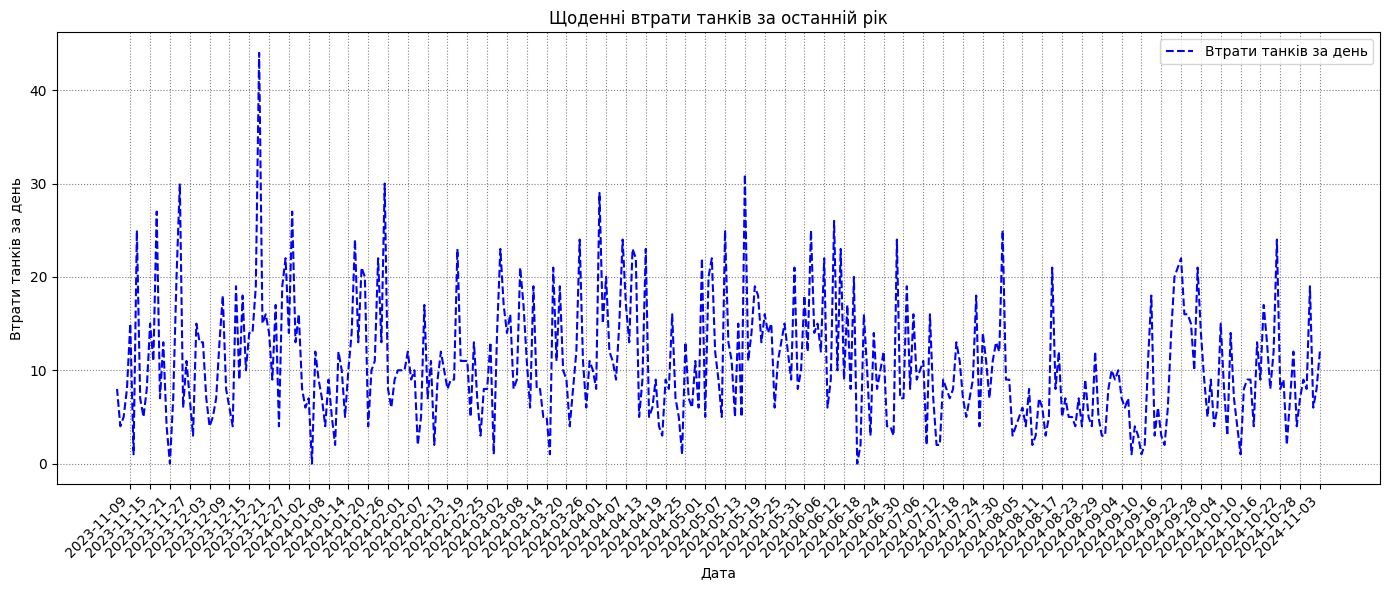

In [ ]:


import numpy as np
import csv
import matplotlib.pyplot as plt


def column_function(file, column_name):
    with open(file, 'r') as f:
        reader = list(csv.reader(f))
        headers = reader[0]
        column_index = headers.index(column_name)
        data = np.array(reader[1:])[:, column_index]
    return data

def daily_losses_func(data):
    last_day = np.array([data[-1]])
    next_days = data[:-1] - data[1:]
    return np.concatenate([next_days, last_day])


def most_daily_losses():
    most_losses = np.sort(daily_losses)[-4:]
    return most_losses


def losses_by_spring(dates, losses):
    start = "2023-03-01"
    end = "2023-05-31"
    total_losses = (dates >= start) & (dates <= end)
    return losses[total_losses]


def last_100_days(daily_losses):
    last_100_days_lose = daily_losses[:100]
    return np.mean(last_100_days_lose)


file = '/content/russia_losses_equipment (1).csv'
plane_losses = column_function(file, 'aircraft').astype(int)


def daily_losses(data):
    last_day = np.array([data[-1]])
    next_days = data[:-1] - data[1:]
    return np.concatenate([next_days, last_day])


daily_plane_losses = daily_losses_func(plane_losses)


def last_300_days(daily_losses):
    last_300_days_losses = daily_losses[-300:]
    return np.mean(last_300_days)


average_losses_300 = average_last_300_days(daily_plane_losses)
print(f"Середнє значення втрат авіації за останні 300 днів: {average_losses_300}")




def top_3_daily_losses(daily_losses):
    sorted_losses = np.sort(daily_losses)
    top_3_losses = sorted_losses[-3:]
    return top_3_losses[::-1]


top_3_losses = top_3_daily_losses(daily_plane_losses)
print(f"Три найбільші добові втрати літаків: {top_3_losses}")


def graph(dates, losses):
    plt.figure(figsize=(14, 6), dpi=100)
    plt.plot(dates, losses, linestyle='--', color='blue', label='Втрати танків за день')

    plt.title('Щоденні втрати танків за останній рік')
    plt.xlabel('Дата')
    plt.ylabel('Втрати танків за день')
    plt.gca().invert_xaxis()

    plt.grid(True, which='both', linestyle='dotted', color='gray')
    plt.legend()

    plt.xticks(ticks=np.arange(0, len(dates), 6), rotation=45, ha='right')
    plt.tight_layout()

    plt.savefig('daily_tank_losses_last_year.png')
    plt.show()




tank_losses = column_function(file, 'tank').astype(int)

dates = column_function(file, 'date')

daily_losses = daily_losses_func(tank_losses)
print(daily_losses)
print(f"Найбільше знищено:{most_daily_losses()}")

spring_losses = np.sum(losses_by_spring(dates, daily_losses))
print(f"Кількість танків, знищених навесні 2023 года: {spring_losses}")

average_last_100_days = last_100_days(daily_losses)
print(f"Середня кількість знищених танків за останні 100 днів війни: {average_last_100_days}")

daily_for_graph = daily_losses[:365]
dates_for_graph = dates[:365]

graph( dates_for_graph, daily_for_graph)
